# Train Custom Model Using Scikit Learn - Bench Press
## 1. Read in Collected Data and Process

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [36]:
df = pd.read_csv('benchpress_coords.csv')

In [37]:
df.head(3)

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,b_correct_up,0.342405,0.293187,0.615661,0.999998,0.333918,0.293168,0.662415,0.999998,0.334999,...,-0.892839,0.994734,0.979807,0.611790,-0.042018,0.975278,0.725297,0.738664,-1.020206,0.997877
1,b_correct_down,0.347209,0.290651,0.494753,0.999993,0.336074,0.285710,0.560588,0.999994,0.336740,...,-0.707418,0.985596,0.972952,0.608905,-0.118859,0.956751,0.724160,0.736117,-0.862484,0.994825
2,b_correct_down,0.338909,0.297234,0.494922,0.999994,0.325614,0.295111,0.539178,0.999996,0.326345,...,-0.764271,0.978585,0.978824,0.608172,-0.101540,0.941800,0.723257,0.737576,-0.921502,0.993139


In [38]:
print(df['class'].unique())

['b_correct_up' 'b_correct_down' 'b_excessive_arch_up'
 'b_excessive_arch_down' 'b_arms_spread_down' 'b_arms_spread_up']


In [39]:
df[df['class'] == 'b_correct_up']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,b_correct_up,0.342405,0.293187,0.615661,0.999998,0.333918,0.293168,0.662415,0.999998,0.334999,...,-0.892839,0.994734,0.979807,0.611790,-0.042018,0.975278,0.725297,0.738664,-1.020206,0.997877
4,b_correct_up,0.337070,0.292075,0.581475,0.999998,0.329630,0.290616,0.630095,0.999999,0.331256,...,-0.825383,0.985708,0.987015,0.609234,-0.114778,0.966898,0.723577,0.738962,-0.948455,0.994775
5,b_correct_up,0.310121,0.313170,0.639881,0.999996,0.297345,0.319019,0.693260,0.999997,0.298430,...,-0.649562,0.988567,0.983249,0.608542,0.052660,0.944017,0.724452,0.735949,-0.764399,0.995900
7,b_correct_up,0.336981,0.286422,0.439760,0.999998,0.329804,0.283867,0.492865,0.999998,0.331842,...,-0.883760,0.989945,0.981457,0.610416,0.034041,0.969742,0.727848,0.738571,-1.013420,0.996523
9,b_correct_up,0.329401,0.288978,0.521810,0.999999,0.320499,0.288602,0.571868,1.000000,0.322092,...,-0.776013,0.989644,0.981634,0.610045,-0.010070,0.973975,0.724206,0.740321,-0.892612,0.996029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,b_correct_up,0.511722,0.361218,0.734899,1.000000,0.519617,0.361208,0.782905,0.999999,0.526837,...,-0.027761,0.965191,0.817601,0.745092,-0.194736,0.901855,0.191760,0.739280,-0.193436,0.967587
795,b_correct_up,0.522448,0.359301,0.685669,1.000000,0.529138,0.359350,0.741602,0.999999,0.535176,...,0.030338,0.968238,0.819099,0.744619,-0.070407,0.895582,0.191392,0.741561,-0.126993,0.968270
797,b_correct_up,0.514979,0.364079,0.845882,1.000000,0.522700,0.366122,0.898016,1.000000,0.529844,...,-0.046444,0.971348,0.819900,0.741059,-0.181481,0.917248,0.194352,0.737649,-0.212081,0.977892
800,b_correct_up,0.514738,0.363740,0.822302,0.999999,0.522630,0.365405,0.866516,0.999999,0.530004,...,-0.051480,0.966948,0.821852,0.740291,-0.193750,0.912899,0.193328,0.737935,-0.213983,0.971317


In [40]:
X = df.drop('class', axis=1)
y = df['class']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Train Machine Learning Classification Model

In [42]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [43]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [44]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [45]:
fit_models['rc'].predict(X_test)

array(['b_arms_spread_down', 'b_excessive_arch_down', 'b_arms_spread_up',
       'b_correct_down', 'b_excessive_arch_down', 'b_arms_spread_down',
       'b_excessive_arch_down', 'b_arms_spread_up', 'b_arms_spread_up',
       'b_excessive_arch_up', 'b_arms_spread_up', 'b_arms_spread_down',
       'b_arms_spread_up', 'b_correct_down', 'b_arms_spread_up',
       'b_arms_spread_up', 'b_arms_spread_up', 'b_excessive_arch_up',
       'b_correct_down', 'b_excessive_arch_down', 'b_excessive_arch_down',
       'b_excessive_arch_down', 'b_excessive_arch_up',
       'b_excessive_arch_up', 'b_correct_up', 'b_excessive_arch_down',
       'b_arms_spread_down', 'b_excessive_arch_down', 'b_correct_up',
       'b_excessive_arch_up', 'b_arms_spread_down', 'b_correct_down',
       'b_excessive_arch_down', 'b_correct_up', 'b_arms_spread_down',
       'b_correct_up', 'b_correct_down', 'b_correct_down',
       'b_excessive_arch_down', 'b_arms_spread_up',
       'b_excessive_arch_down', 'b_excessive_arch_up'

## 3.Evaluate and Serialize Model

In [46]:
from sklearn.metrics import classification_report

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 각 모델의 분류 보고서 출력
for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} 모델 분류 결과 평가 ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr 모델 분류 결과 평가 ---
                       precision    recall  f1-score   support

   b_arms_spread_down       0.93      0.90      0.92        60
     b_arms_spread_up       0.89      0.92      0.90        51
       b_correct_down       0.98      0.94      0.96        48
         b_correct_up       0.95      0.97      0.96        37
b_excessive_arch_down       0.98      0.96      0.97        51
  b_excessive_arch_up       0.95      1.00      0.98        40

             accuracy                           0.94       287
            macro avg       0.95      0.95      0.95       287
         weighted avg       0.94      0.94      0.94       287


--- rc 모델 분류 결과 평가 ---
                       precision    recall  f1-score   support

   b_arms_spread_down       0.95      0.92      0.93        60
     b_arms_spread_up       0.92      0.90      0.91        51
       b_correct_down       0.96      0.92      0.94        48
         b_correct_up       0.88      0.97      0.92        37
b_ex

In [47]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.9443
rc: 0.9408
rf: 0.9617
gb: 0.9443
--- precision ---
lr: 0.9449
rc: 0.9418
rf: 0.9633
gb: 0.9460
--- recall ---
lr: 0.9443
rc: 0.9408
rf: 0.9617
gb: 0.9443
--- f1-score ---
lr: 0.9442
rc: 0.9407
rf: 0.9617
gb: 0.9438


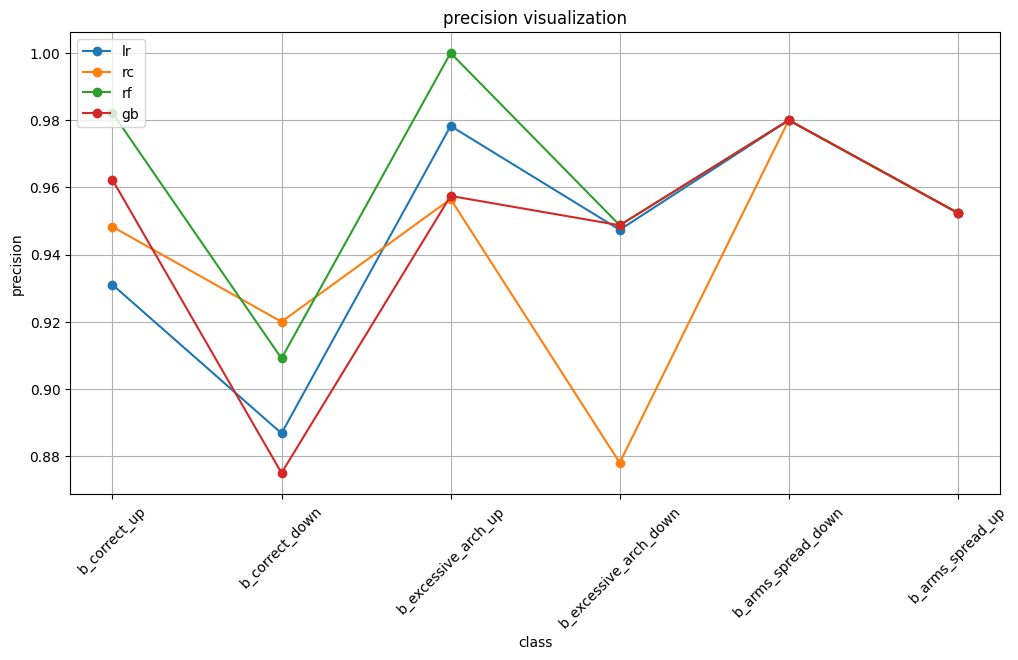

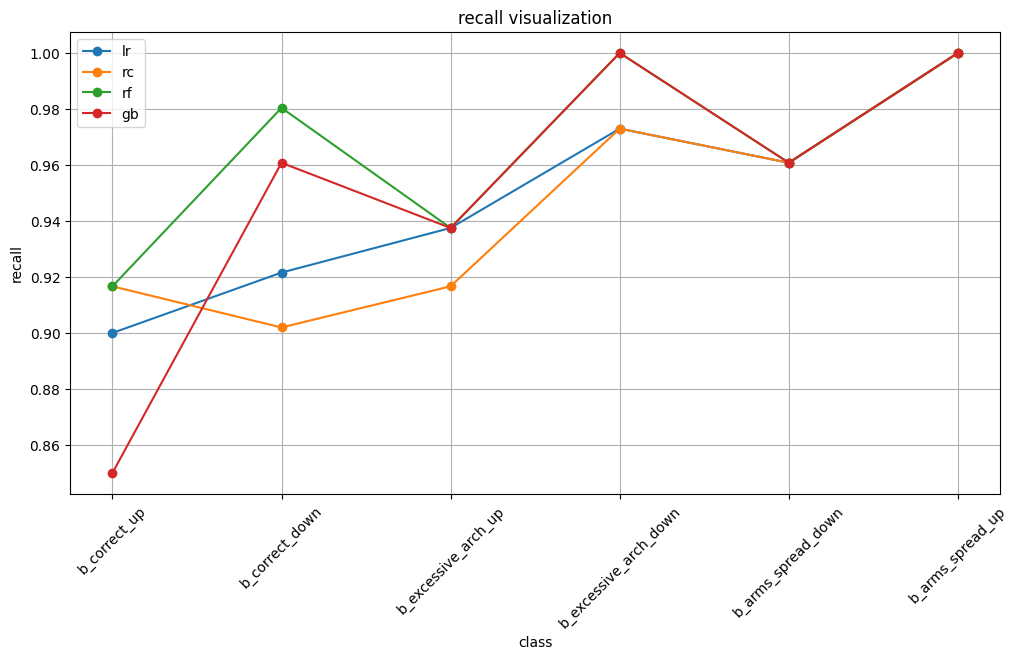

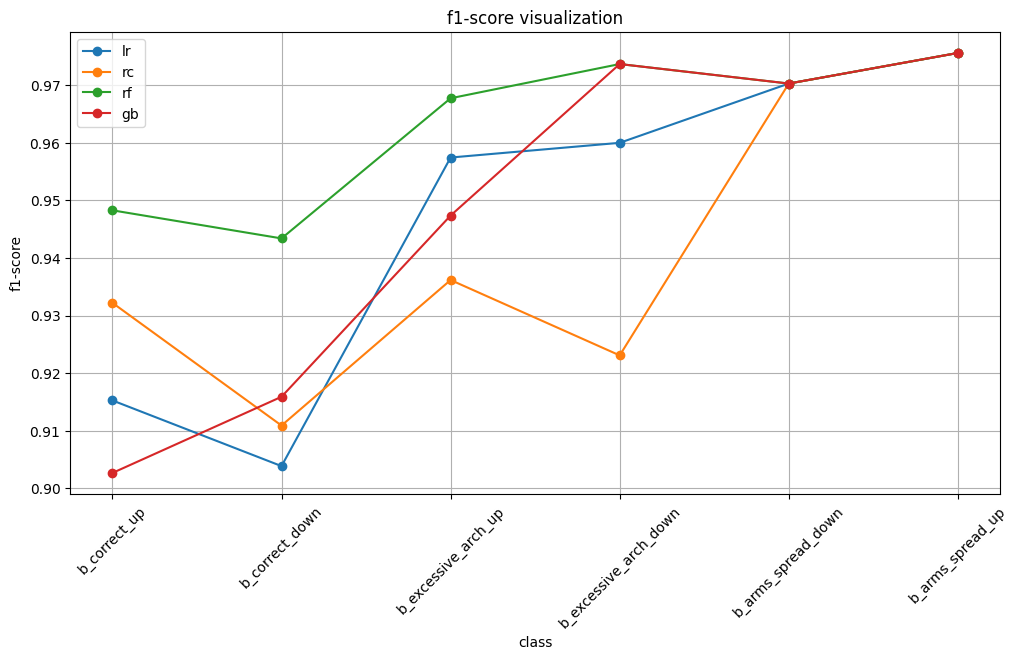

In [48]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 평가 지표 시각화
metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

## 4. Make Detections with Model

In [49]:
with open('benchpress.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)